Inicialize o código abaixo para carregar o setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


**1.** Carregar o dataset sobre Alzheimer

In [2]:
alz_location = '/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv'

alz_data = pd.read_csv(alz_location)

**2.** Conhecer o dataset

In [3]:
alz_data.shape

(2149, 35)

In [4]:
alz_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


**3.** Iniciar o tratamento de dados

In [5]:
missing_values = alz_data.isnull().sum()

missing_values

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Não é necessário realizar tratamento para valores não preenchidos, então verificaremos se há algum tipo de data diferente de número

In [6]:
text_columns = (alz_data.dtypes == 'object')
object_cols = list(text_columns[text_columns].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['DoctorInCharge']


Pelo fato de a única coluna a ter um dado diferente de número ser a DoctorInCharge, isso não afeta a planilha, pois como os dados desta coluna em específica ser confidencial, ela será removida. A coluna de ID também será removida, pois trata-se de um dado aleatório que não influencia o diagnóstico de alzheimer, servindo apenas para diferenciar os indivíduos da lista.

In [7]:
alz_data = alz_data.drop(['PatientID', 'DoctorInCharge'], axis = 1)

alz_data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


**4.** Com os dados já verificados, é possível iniciar um método para previsão do diagnóstico

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [9]:
X = alz_data
y = X.Diagnosis
X.drop(['Diagnosis'], axis=1, inplace=True)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=1)

In [11]:
my_model = XGBRegressor(n_estimators=1000,learning_rate=0.01, random_state = 0, min_child_weight = 5, subsample=0.8)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [12]:
predictions_1 = my_model.predict(X_valid)

print("Média de erro: "+ str(mean_absolute_error(predictions_1, y_valid)))

Média de erro: 0.12067037785241684


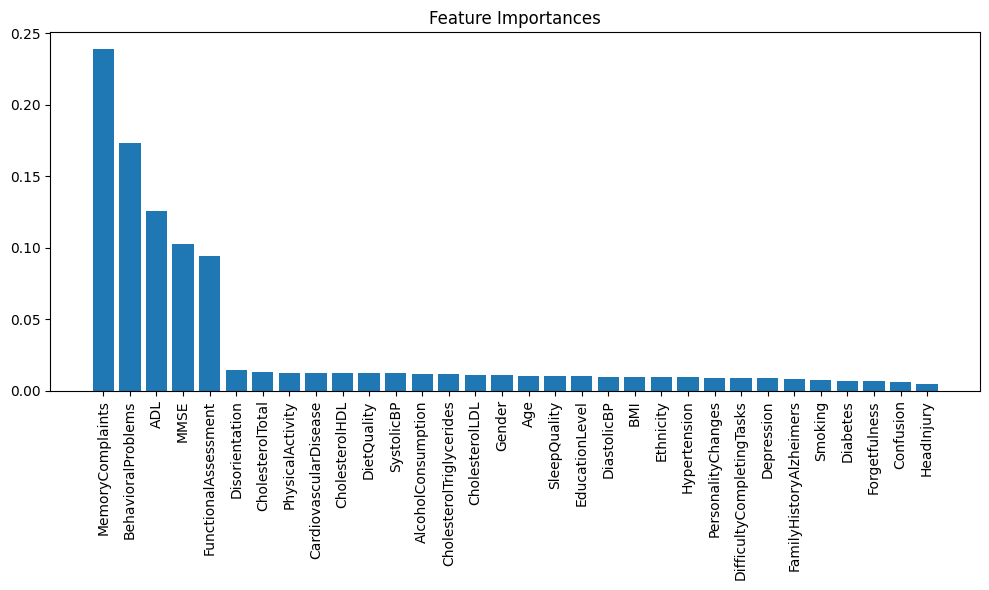

In [13]:
importances_1 = my_model.feature_importances_
feature_names_1 = X_train.columns
indices_1 = np.argsort(importances_1)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances_1[indices_1], align="center")
plt.xticks(range(X_train.shape[1]), feature_names_1[indices_1], rotation=90)
plt.tight_layout()
plt.show()

In [14]:
my_model_2 = RandomForestRegressor(n_estimators=1000, random_state=0)
my_model_2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [15]:
predictionsRF = my_model_2.predict(X_valid)

print("Média de erro: "+ str(mean_absolute_error(predictionsRF, y_valid)))

Média de erro: 0.12002558139534883


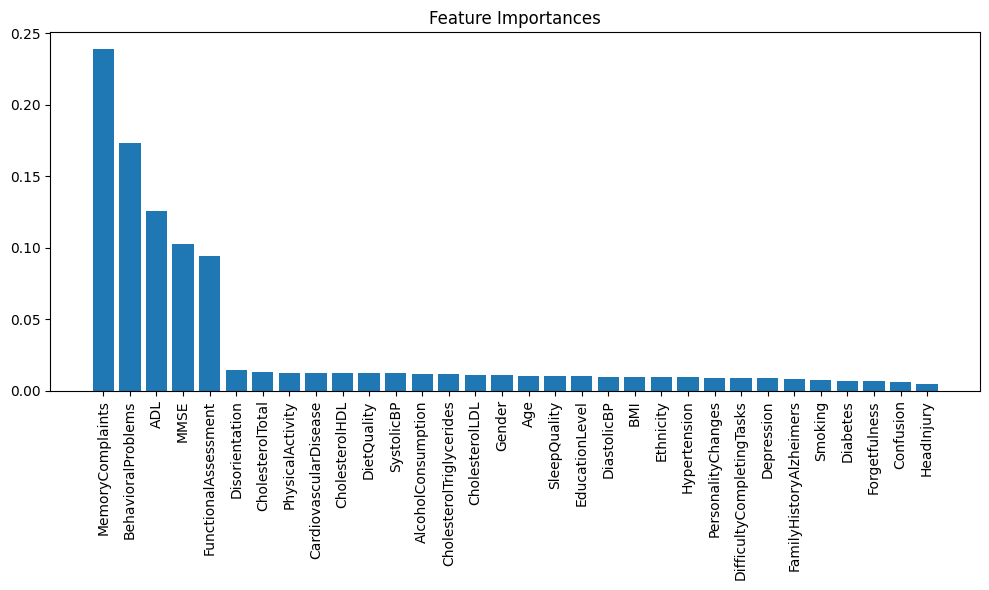

In [16]:
importances_2 = my_model.feature_importances_
feature_names_2 = X_train.columns
indices_2 = np.argsort(importances_2)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances_2[indices_2], align="center")
plt.xticks(range(X_train.shape[1]), feature_names_2[indices_2], rotation=90)
plt.tight_layout()
plt.show()

In [17]:
my_model_3 = CatBoostRegressor(n_estimators=1000, learning_rate=0.01, random_state=0, verbose=0)
my_model_3.fit(X_train, y_train)

In [18]:
predictions_3 = my_model_3.predict(X_valid)

print("Média de erro: "+ str(mean_absolute_error(predictions_3, y_valid)))

Média de erro: 0.1293636861487131


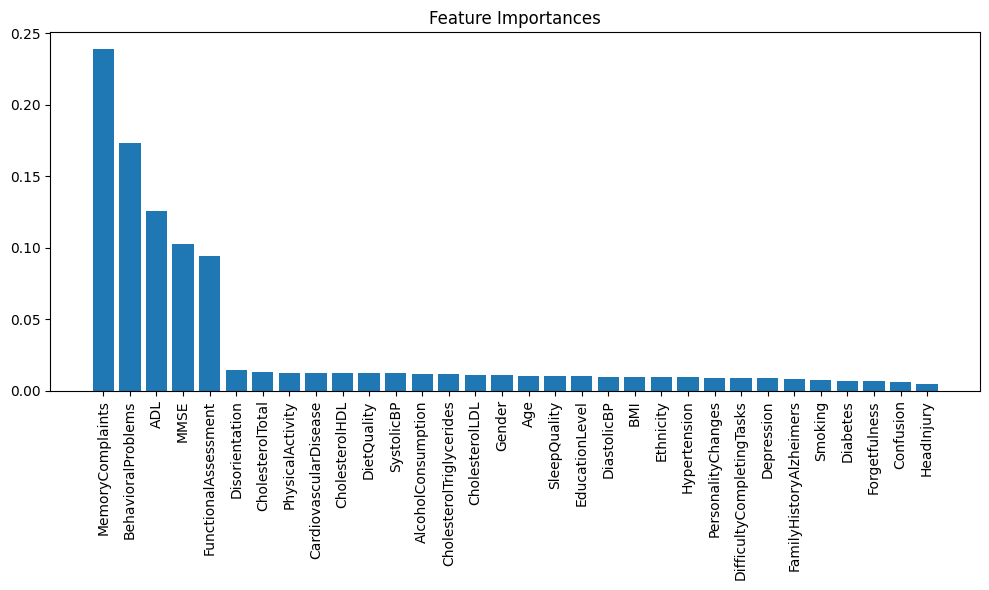

In [19]:
importances_3 = my_model.feature_importances_
feature_names_3 = X_train.columns
indices_3 = np.argsort(importances_3)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances_3[indices_3], align="center")
plt.xticks(range(X_train.shape[1]), feature_names_3[indices_3], rotation=90)
plt.tight_layout()
plt.show()

In [20]:
my_model_4 = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=0)
my_model_4.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=0)

In [21]:
predictions_4 = my_model_4.predict(X_valid)

print("Média de erro: "+ str(mean_absolute_error(predictions_4, y_valid)))

Média de erro: 0.4037887467000102


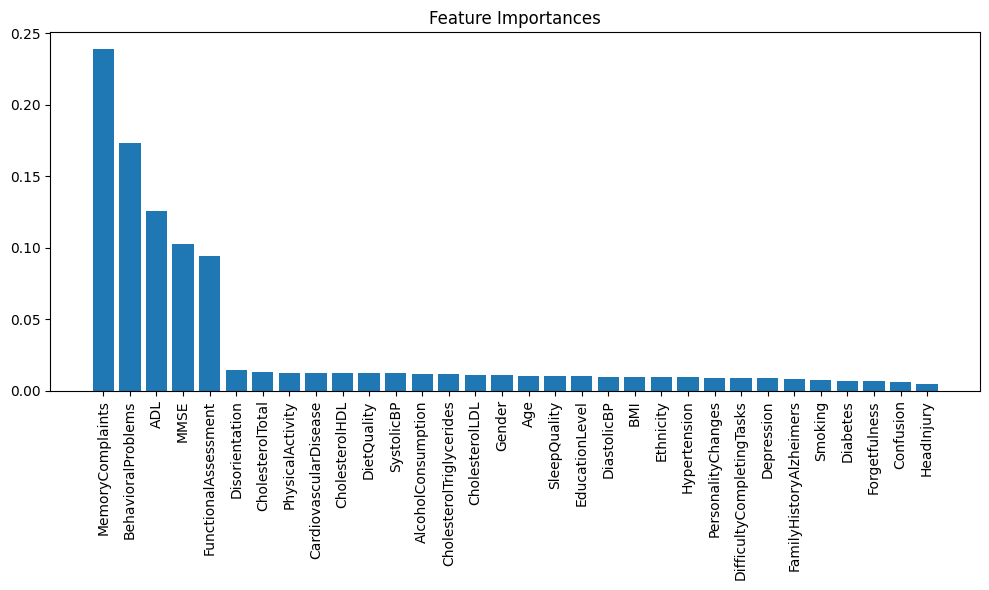

In [22]:
importances_4 = my_model.feature_importances_
feature_names_4 = X_train.columns
indices_4 = np.argsort(importances_4)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances_4[indices_4], align="center")
plt.xticks(range(X_train.shape[1]), feature_names_4[indices_4], rotation=90)
plt.tight_layout()
plt.show()

Utilizando 5 tipos de modelos diferentes, observou-se que o RandomForest obteve o melhor resultado. É indiscritivel que ao utilizar maiores quantidades estimativas, o valor do erro tende a ser o mesmo. Mudar os parâmetros também não influencia de maneira significativa no resultado, tendo uma média de 12% de erro. Os gráficos reveleram que apenas 5 dos demais parametros são os mais importantes para verificar o diagnóstico, então será realizado um novo treino apenas com estes paremetros com os métodos que tiveram melhores resultados.

In [23]:
new_X = X[['MemoryComplaints', 'BehavioralProblems', 'ADL', 'MMSE', 'FunctionalAssessment']]

In [24]:
new_X_train, new_X_valid, y_train, y_valid = train_test_split(new_X, y, train_size=0.8, test_size=0.2,random_state=1)

In [25]:
my_model.fit(new_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [26]:
new_predictions_1 = my_model.predict(new_X_valid)

print("Média de erro: "+ str(mean_absolute_error(new_predictions_1, y_valid)))

Média de erro: 0.11753303490702312


In [27]:
my_model_2.fit(new_X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [28]:
new_predictionsRF = my_model_2.predict(new_X_valid)

print("Média de erro: "+ str(mean_absolute_error(new_predictionsRF, y_valid)))

Média de erro: 0.10202790697674419


Desta forma, conseguimos diminuir o erro, encontrando por fim uma taxa de acerto próxima de 90% com este método de treinamento!